In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
claims = pd.read_csv("../../../data/preprocessed_claims_new.csv", index_col=0)
claims.shape

(40608, 5)

In [3]:
train_idx = claims["date"].apply(lambda x : x.split("-")[0]) != "2022"
val_idx = claims["date"].apply(lambda x : x.split("-")[0]) == "2022"
# double check
"2022" in claims[train_idx]["date"].apply(lambda x: x.split("-")[0]).value_counts().index

False

In [4]:
X = claims[train_idx]["claim"].values
y = claims[train_idx]["truth_rating"].values
# validation data
X_val = claims[val_idx]["claim"].values
y_val = claims[val_idx]["truth_rating"].values
X.shape, y.shape, X_val.shape, y_val.shape

((37983,), (37983,), (2625,), (2625,))

In [5]:
test_set = pd.read_csv("test_set.csv", index_col=0)
X_test = test_set["claim"].values
y_test = test_set["label"].values
X_test.shape, X_val.shape


((1680,), (2625,))

In [17]:
y_test = ["OTHER" if l == "NEITHER" else l for l in y_test]

## Compare train, val & test set

In [19]:
train_dist = pd.Series(y).value_counts()
val_dist = pd.Series(y_val).value_counts()
test_dist = pd.Series(y_test).value_counts()

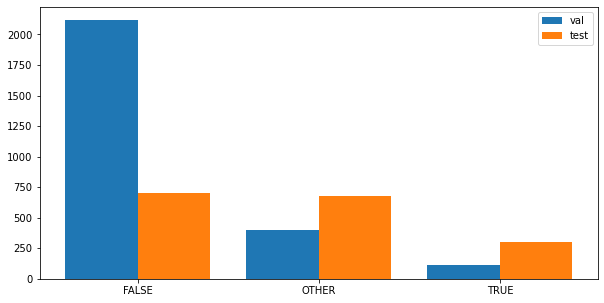

In [28]:
X_axis = np.arange(len(train_dist.index))
plt.figure(figsize=(10,5))
#plt.bar(X_axis -0.2, train_dist.values, 0.4,  label="train")
plt.bar(X_axis -0.2 , val_dist.values, 0.4, label="val")
plt.bar(X_axis + 0.2, test_dist.values, 0.4, label="test")
plt.legend()
plt.xticks(X_axis, val_dist.index);

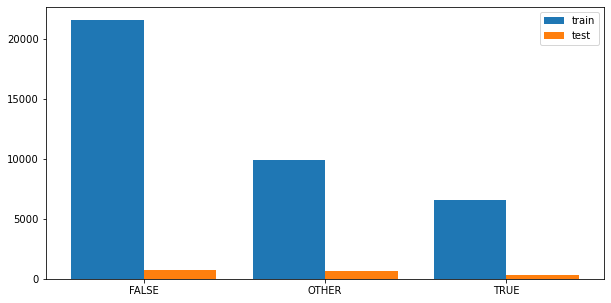

In [29]:
X_axis = np.arange(len(train_dist.index))
plt.figure(figsize=(10,5))
plt.bar(X_axis -0.2, train_dist.values, 0.4,  label="train")
#plt.bar(X_axis -0.2 , val_dist.values, 0.4, label="val")
plt.bar(X_axis + 0.2, test_dist.values, 0.4, label="test")
plt.legend()
plt.xticks(X_axis, val_dist.index);

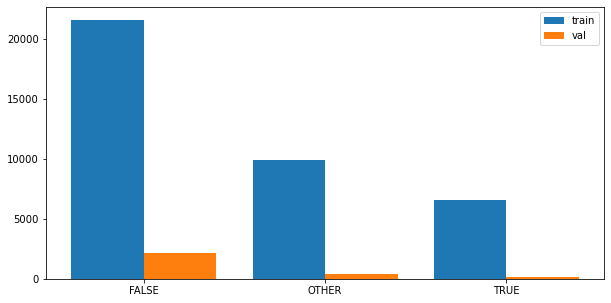

In [30]:
X_axis = np.arange(len(train_dist.index))
plt.figure(figsize=(10,5))
plt.bar(X_axis -0.2, train_dist.values, 0.4,  label="train")
plt.bar(X_axis +0.2 , val_dist.values, 0.4, label="val")
#plt.bar(X_axis + 0.2, test_dist.values, 0.4, label="test")
plt.legend()
plt.xticks(X_axis, val_dist.index);

In [31]:
import seaborn as sns

In [48]:
train = pd.DataFrame({"x" : train_dist.index, "c" : train_dist.values,  "g" : "train"})
val = pd.DataFrame({"x" : val_dist.index, "c" : val_dist.values, "g" : "val"})
test = pd.DataFrame({"x" : test_dist.index, "c" : test_dist.values, "g" : "test"})

In [49]:
plotting = pd.concat((train, val, test), axis=0)

In [58]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(32,18)})

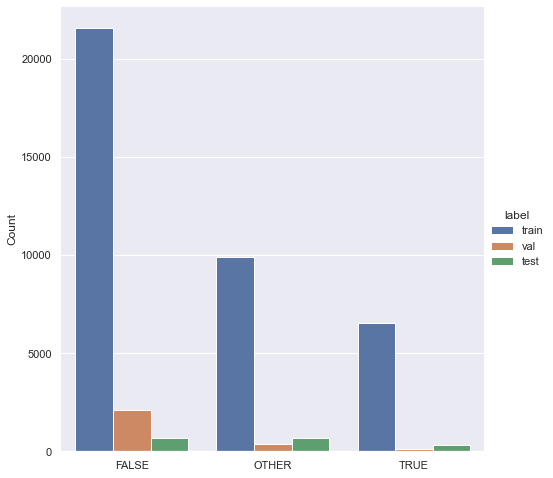

In [73]:
p = sns.catplot(data=plotting, kind="bar", x="x", y="c", hue="g", height=7)
p.despine(left=True)
p.set_axis_labels("", "Count")
p.legend.set_title("label")